In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
from RAVEN.pe.mac_taylor_utils import *
import matplotlib.pyplot as plt

# test MAC_Taylor

In [18]:
a = torch.arange(0, 1, 0.001).cuda()

precise = torch.exp(a).cuda()

point = 0.5
scale = torch.exp(torch.tensor([point])).cuda()
var = a - point

exp_coeff = torch.tensor([1/1, 1/1, 1/2, 1/6, 1/24, 1/120, 1/720, 1/5040, 1/40320, 1/362880])

coeff = coeff[0:8]
print(coeff)

approximate = MAC_Taylor(scale, 
                         coeff, 
                         var, 
                         fxp=True, 
                         intwidth=7, 
                         fracwidth=8, 
                         rounding_coeff="round", 
                         rounding_var="floor", 
                         keepwidth=True)

error = (approximate - precise) / precise
print("min error rate:", error.min())
print("max error rate:", error.max())
print("avg error rate:", error.mean())
print("rms error rate:", error.mul(error).mean().sqrt())

tensor([1.0000e+00, 1.0000e+00, 5.0000e-01, 1.6667e-01, 4.1667e-02, 8.3333e-03,
        1.3889e-03, 1.9841e-04])
min error rate: tensor(-0.0118, device='cuda:0')
max error rate: tensor(-0.0001, device='cuda:0')
avg error rate: tensor(-0.0053, device='cuda:0')
rms error rate: tensor(0.0056, device='cuda:0')


# point search test

1. test exp with gaussian input

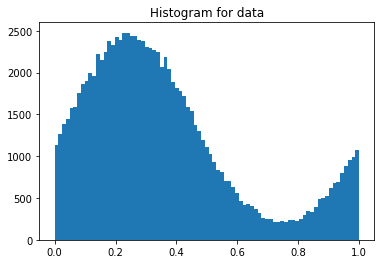

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0.1666667', '0.0416667']
min error: ['-0.2628040', '-0.0810297', '-0.0209493', '-0.0070026', '-0.0056889']
max error: ['0.0000000', '0.0000000', '0.0000000', '0.0000000', '0.0000000']
avg error: ['-0.0617248', '-0.0135388', '-0.0039736', '-0.0022983', '-0.0021654']
rms error: ['0.0925480', '0.0239799', '0.0060123', '0.0026663', '0.0024400']

gaussian data mu= 0.25 Taylor expansion point= 0.25
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0.1666667', '0.0416667']
min error: ['-0.1748022', '-0.0449633', '-0.0122595', '-0.0096411', '-0.0096411']
max error: ['-0.0021614', '0.0000000', '-0.0021614', '-0.0021614', '-0.0021614']
avg error: ['-0.0303950', '-0.0087089', '-0.0057880', '-0.0053276', '-0.0052967']
rms error: ['0.0527238', '0.0128025', '0.0061379', '0.0055245', '0.0054894']

gaussian data mu= 0.25 Taylor expansion point= 0.5
eff coeff: ['1.0000000', '1.0000000', '0.5000000',

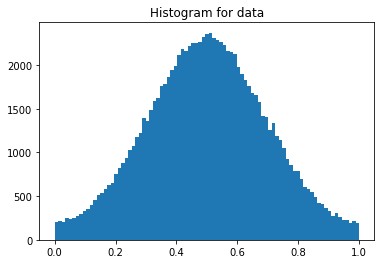

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0.1666667', '0.0416667']
min error: ['-0.2628040', '-0.0810297', '-0.0209493', '-0.0070026', '-0.0056889']
max error: ['0.0000000', '0.0000000', '0.0000000', '0.0000000', '0.0000000']
avg error: ['-0.0956469', '-0.0197516', '-0.0048241', '-0.0024372', '-0.0023042']
rms error: ['0.1111923', '0.0253299', '0.0059083', '0.0026796', '0.0024938']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0.1666667', '0.0416667']
min error: ['-0.1748022', '-0.0449633', '-0.0122595', '-0.0096411', '-0.0096411']
max error: ['-0.0021614', '0.0000000', '-0.0021614', '-0.0021614', '-0.0021614']
avg error: ['-0.0409153', '-0.0098421', '-0.0057570', '-0.0052826', '-0.0052749']
rms error: ['0.0547854', '0.0120930', '0.0059637', '0.0054221', '0.0054132']

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0

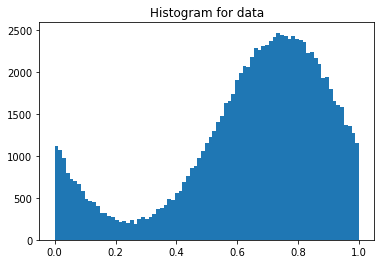

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0.1666667', '0.0416667']
min error: ['-0.2628040', '-0.0810297', '-0.0209493', '-0.0070026', '-0.0056889']
max error: ['0.0000000', '0.0000000', '0.0000000', '0.0000000', '0.0000000']
avg error: ['-0.1441944', '-0.0353264', '-0.0082338', '-0.0031353', '-0.0026858']
rms error: ['0.1607749', '0.0414608', '0.0096791', '0.0034478', '0.0029053']

gaussian data mu= 0.75 Taylor expansion point= 0.25
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0.1666667', '0.0416667']
min error: ['-0.1748022', '-0.0449633', '-0.0122595', '-0.0096411', '-0.0096411']
max error: ['-0.0021614', '0.0000000', '-0.0021614', '-0.0021614', '-0.0021614']
avg error: ['-0.0788692', '-0.0171783', '-0.0068996', '-0.0054134', '-0.0053677']
rms error: ['0.0915029', '0.0202892', '0.0071799', '0.0055367', '0.0054850']

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['1.0000000', '1.0000000', '0.5000000',

In [4]:
point_search(func="exp", uniform=False, intwidth=7, fracwidth=8, valid=True, rounding_coeff="round", rounding_var="floor")

2. test div with gaussian input

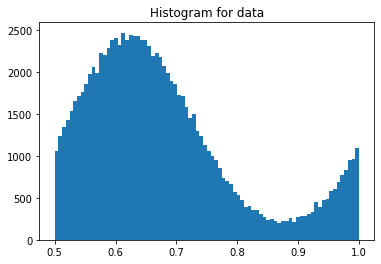

gaussian data mu= 0.625 Taylor expansion point= 1.0
eff coeff: ['1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000']
min error: ['-0.2500000', '-0.1250000', '-0.0625000', '-0.0315552', '-0.0165405', '-0.0090332', '-0.0055847', '-0.0038604']
max error: ['-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153']
avg error: ['-0.1204638', '-0.0481696', '-0.0206217', '-0.0094946', '-0.0052487', '-0.0033773', '-0.0026580', '-0.0024046']
rms error: ['0.1379359', '0.0585920', '0.0262693', '0.0124069', '0.0065492', '0.0038959', '0.0028909', '0.0025602']



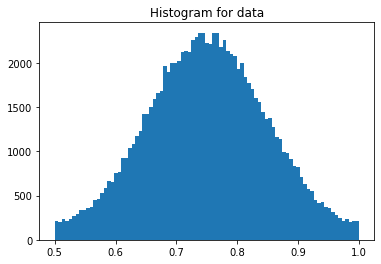

gaussian data mu= 0.75 Taylor expansion point= 1.0
eff coeff: ['1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000']
min error: ['-0.2500000', '-0.1250000', '-0.0625000', '-0.0315552', '-0.0165405', '-0.0090332', '-0.0055847', '-0.0038604']
max error: ['-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153']
avg error: ['-0.0731272', '-0.0245779', '-0.0096615', '-0.0045932', '-0.0031204', '-0.0025821', '-0.0024231', '-0.0023769']
rms error: ['0.0891250', '0.0337119', '0.0141714', '0.0065741', '0.0038471', '0.0028653', '0.0026058', '0.0025425']



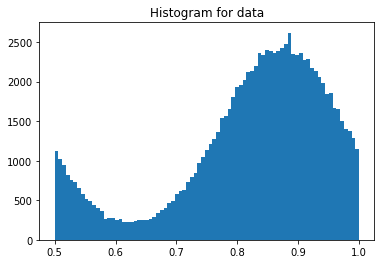

gaussian data mu= 0.875 Taylor expansion point= 1.0
eff coeff: ['1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000']
min error: ['-0.2500000', '-0.1250000', '-0.0625000', '-0.0315552', '-0.0165405', '-0.0090332', '-0.0055847', '-0.0038604']
max error: ['-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153']
avg error: ['-0.0479551', '-0.0175024', '-0.0079333', '-0.0044358', '-0.0031230', '-0.0025173', '-0.0022431', '-0.0021054']
rms error: ['0.0792251', '0.0346155', '0.0162757', '0.0081475', '0.0045966', '0.0030756', '0.0025327', '0.0023348']



In [4]:
point_search(func="div", uniform=False, intwidth=7, fracwidth=8, valid=True, rounding_coeff="round", rounding_var="floor")

3. test log with gaussian input

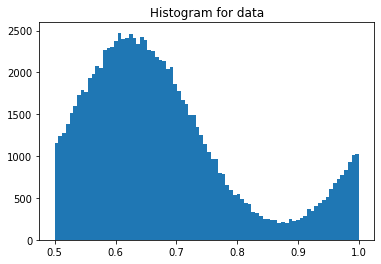

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931472', '2.0000000', '2.0000000', '2.6666667', '4.0000000', '6.4000001', '10.6666670', '18.2857151']
min error: ['-77.8495102', '-0.0057910', '-34.9335480', '-0.0075944', '-21.9589577', '-0.0087799', '-15.9706841', '-0.0116934']
max error: ['-0.0025116', '47.9042358', '-0.0001034', '26.9452763', '0.0000033', '17.9628658', '0.0008181', '13.9706841']
avg error: ['-1.6746775', '0.9570833', '-0.6813630', '0.4954815', '-0.4045033', '0.3131373', '-0.2848893', '0.2279322']
rms error: ['7.8661103', '4.8050518', '3.4951677', '2.6693552', '2.1712222', '1.7637650', '1.5704827', '1.3541871']

gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['0.4700036', '1.6000000', '1.2800000', '1.3653333', '1.6384000', '2.0971520']
min error: ['-32.9374580', '-0.0092478', '-5.9902282', '-0.0152654', '-1.0000000', '-0.0375863']
max error: ['-0.0012017', '11.9745932', '0.0000033', '1.9941367', '0.0013022', '0.0084284']
avg error:

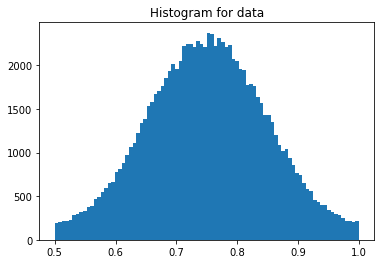

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931472', '2.0000000', '2.0000000', '2.6666667', '4.0000000', '6.4000001', '10.6666670', '18.2857151']
min error: ['-77.8495102', '-0.0057910', '-34.9335480', '-0.0075944', '-21.9589577', '-0.0087799', '-15.9706841', '-0.0116934']
max error: ['-0.0025116', '47.9042358', '-0.0001034', '26.9452763', '0.0000033', '17.9628658', '0.0008181', '13.9706841']
avg error: ['-0.8892978', '0.4302543', '-0.2768264', '0.1752971', '-0.1393671', '0.0942601', '-0.0900551', '0.0594353']
rms error: ['3.7270665', '2.2518861', '1.6292427', '1.2368959', '1.0042453', '0.8126053', '0.7232103', '0.6206295']

gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['0.4700036', '1.6000000', '1.2800000', '1.3653333', '1.6384000', '2.0971520']
min error: ['-32.9374580', '-0.0092478', '-5.9902282', '-0.0152654', '-1.0000000', '-0.0375863']
max error: ['-0.0012017', '11.9745932', '0.0000033', '1.9941367', '0.0013022', '0.0084284']
avg error: [

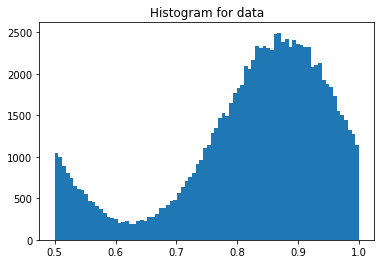

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931472', '2.0000000', '2.0000000', '2.6666667', '4.0000000', '6.4000001', '10.6666670', '18.2857151']
min error: ['-77.8495102', '-0.0057910', '-34.9335480', '-0.0075944', '-21.9589577', '-0.0087799', '-15.9706841', '-0.0116934']
max error: ['-0.0025116', '47.9042358', '-0.0001034', '26.9452763', '0.0000033', '17.9628658', '0.0008181', '13.9706841']
avg error: ['-3.0037425', '1.6689788', '-1.1449934', '0.8041432', '-0.6365415', '0.4792898', '-0.4265704', '0.3279014']
rms error: ['8.5294619', '5.1773748', '3.7531970', '2.8517060', '2.3160770', '1.8742814', '1.6681215', '1.4306811']

gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: ['0.4700036', '1.6000000', '1.2800000', '1.3653333', '1.6384000', '2.0971520']
min error: ['-32.9374580', '-0.0092478', '-5.9902282', '-0.0152654', '-1.0000000', '-0.0375863']
max error: ['-0.0012017', '11.9745932', '0.0000033', '1.9941367', '0.0013022', '0.0084284']
avg error:

In [5]:
point_search(func="log", uniform=False, intwidth=7, fracwidth=8, valid=True, rounding_coeff="round", rounding_var="floor")

4. test exp with uniform input

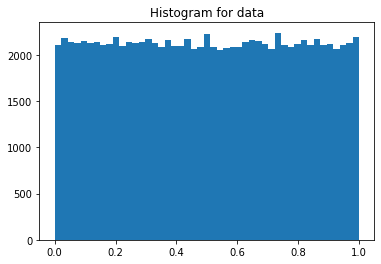

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0.1666667', '0.0416667']
min error: ['-0.2628040', '-0.0810297', '-0.0209493', '-0.0070026', '-0.0056889']
max error: ['0.0000000', '0.0000000', '0.0000000', '0.0000000', '0.0000000']
avg error: ['-0.1030228', '-0.0245048', '-0.0061206', '-0.0027101', '-0.0024163']
rms error: ['0.1315194', '0.0340862', '0.0081240', '0.0030872', '0.0026802']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0.1666667', '0.0416667']
min error: ['-0.1748022', '-0.0449633', '-0.0122595', '-0.0096411', '-0.0096411']
max error: ['-0.0021614', '0.0000000', '-0.0021614', '-0.0021614', '-0.0021614']
avg error: ['-0.0549396', '-0.0130038', '-0.0063681', '-0.0053880', '-0.0053456']
rms error: ['0.0751378', '0.0171340', '0.0067090', '0.0055477', '0.0054998']

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['1.0000000', '1.0000000', '0.5000000', '0

In [6]:
point_search(func="exp", uniform=True, intwidth=7, fracwidth=8, valid=True, rounding_coeff="round", rounding_var="floor")

5. test div with uniform input

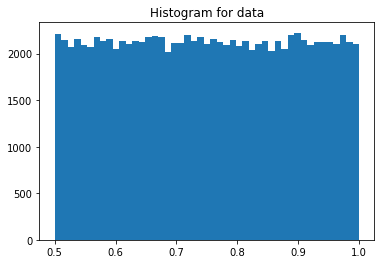

gaussian data mu= 0.5 Taylor expansion point= 1.0
eff coeff: ['1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000', '1.0000000']
min error: ['-0.2500000', '-0.1250000', '-0.0625000', '-0.0315552', '-0.0165405', '-0.0090332', '-0.0055847', '-0.0038604']
max error: ['-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153', '-0.0000153']
avg error: ['-0.0844169', '-0.0330011', '-0.0143894', '-0.0070298', '-0.0042211', '-0.0029646', '-0.0024520', '-0.0022443']
rms error: ['0.1130153', '0.0485700', '0.0221592', '0.0106816', '0.0057487', '0.0035478', '0.0027256', '0.0024423']



In [7]:
point_search(func="div", uniform=True, intwidth=7, fracwidth=8, valid=True, rounding_coeff="round", rounding_var="floor")

6. test log with uniform input

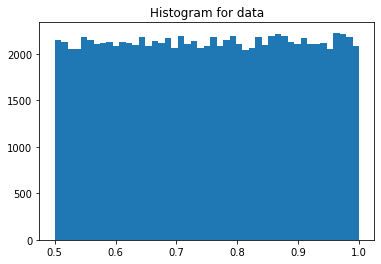

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931472', '2.0000000', '2.0000000', '2.6666667', '4.0000000', '6.4000001', '10.6666670', '18.2857151']
min error: ['-77.8495102', '-0.0057910', '-34.9335480', '-0.0075944', '-21.9589577', '-0.0087799', '-15.9706841', '-0.0116934']
max error: ['-0.0025116', '47.9042358', '-0.0001034', '26.9452763', '0.0000033', '17.9628658', '0.0008181', '13.9706841']
avg error: ['-2.4712453', '1.3944913', '-0.9730573', '0.6954322', '-0.5580778', '0.4265853', '-0.3828984', '0.3008312']
rms error: ['8.5909224', '5.2325363', '3.8000793', '2.8953531', '2.3536570', '1.9085678', '1.6988963', '1.4612676']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['0.4700036', '1.6000000', '1.2800000', '1.3653333', '1.6384000', '2.0971520']
min error: ['-32.9374580', '-0.0092478', '-5.9902282', '-0.0152654', '-1.0000000', '-0.0375863']
max error: ['-0.0012017', '11.9745932', '0.0000033', '1.9941367', '0.0013022', '0.0084284']
avg error: ['-

In [8]:
point_search(func="log", uniform=True, intwidth=7, fracwidth=8, valid=True, rounding_coeff="round", rounding_var="floor")